# Seleção de Protótipos e Atributos

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours

import warnings
warnings.filterwarnings('ignore')

## Métodos para visualização

In [2]:
#Função para visualizar uma região 2d, com duas features
def plot_2d_space(X, y, f1, f2, colors=None, markers=None):
    colors = {"M": "steelblue", "B": "darkorange"} if colors==None else colors
    markers = {"M": "s", "B": "^"} if markers==None else markers
    
    plt.figure()
    labels = list(y.unique())
    labels.sort()

    lines = []
    for i in labels:
        line = plt.scatter(
            X[f1][y==i],
            X[f2][y==i], 
            c=colors[i], 
            marker=markers[i],
            label=i,
        )

        lines.append(line)

    plt.xlabel(f1)
    plt.ylabel(f2)
    

    plt.legend(handles=lines)
        
    plt.show()

In [3]:
def percentage(train, resampled):
  excluidos = (train-resampled)
  percentage = 100 * float(excluidos)/float(train)
  return percentage

## Análise do conjunto de dados

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Francimaria/monitoria-ml/main/breast_cancer_wisconsin_diagnostic.csv')

In [5]:
dataset.head()

,diagnosis,radius_Mean,texture_Mean,periMeter_Mean,area_Mean,sMoothness_Mean,coMpactness_Mean,concavity_Mean,concave points_Mean,syMMetry_Mean,...,radius_worst,texture_worst,periMeter_worst,area_worst,sMoothness_worst,coMpactness_worst,concavity_worst,concave points_worst,syMMetry_worst,fractal_diMension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X = dataset.drop([dataset.columns[0]], axis = 1)
y = dataset[dataset.columns[0]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

**Vamos visuaizar os dados usando duas features**

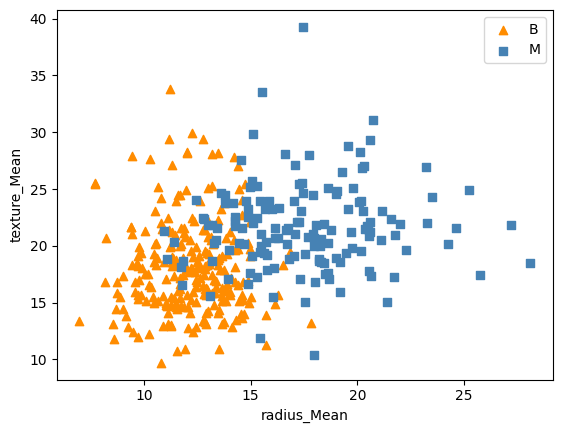

In [8]:
feature_0 = "radius_Mean"
feature_1 = "texture_Mean"

plot_2d_space(X_train, y_train, feature_0, feature_1)

In [9]:
y_train.value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

**Treinando um classificador com os valores default**

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# vamos observar cada uma das classes usando duas features..

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95       107
           M       0.98      0.83      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# **Seleção de Protótipos**



## Edited Nearest Neighbours **(ENN)**

Atua como filtro removedor de ruídos e suavizador de limites de decisão

Parâmetros: 

*sampling_strategy*: Padrão 'auto', ou seja, reamostrar todas as classes, exceto a minoritária. Valores: 'majority', 'not minority', 'not majority', 'all', 'auto'

*n_neighbors*: tamanho da vizinhança a ser considerado para calcular os vizinhos mais próximos.

*kind_sel*: Estratégia usada para excluir amostras. Valores: 'all', 'mode'.

Para mais informações [link](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html).

In [11]:
enn = EditedNearestNeighbours()
enn.get_params()

{'kind_sel': 'all',
 'n_jobs': None,
 'n_neighbors': 3,
 'sampling_strategy': 'auto'}

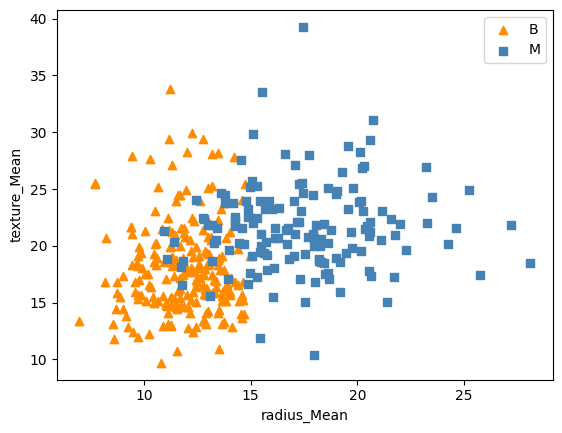

In [12]:
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

#Classes filtradas usando ENN
plot_2d_space(X_train_enn, y_train_enn, feature_0, feature_1)

In [13]:
y_train_enn.value_counts()

B    217
M    148
Name: diagnosis, dtype: int64

In [14]:
print("Porcentegem de redução: %.2f%%" % (percentage(y_train.count(), y_train_enn.count())))

Porcentegem de redução: 8.29%


In [15]:
model = KNeighborsClassifier()

model.fit(X_train_enn, y_train_enn)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.98      0.95       107
           M       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Condensed Nearest Neighbour **(CNN)**


Parâmetros: 

*sampling_strategy*: Padrão 'auto', ou seja, reamostrar todas as classes, exceto a minoritária. Valores: 'majority', 'not minority', 'not majority', 'all', 'auto'

*n_neighbors*: tamanho da vizinhança a ser considerado para calcular os vizinhos mais próximos.

*random_state*: controla a randomização do algoritmo.

*n_seeds_S*: Número de amostras a extrair para construir o conjunto S. Padrão = 1.

Para mais informações [link](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html).

In [16]:
cnn = CondensedNearestNeighbour()
cnn.get_params()

{'n_jobs': None,
 'n_neighbors': None,
 'n_seeds_S': 1,
 'random_state': None,
 'sampling_strategy': 'auto'}

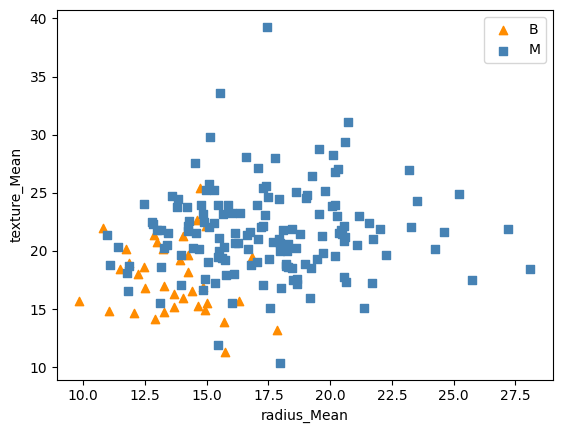

In [17]:
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

#Classes filtradas usando CNN
plot_2d_space(X_train_cnn, y_train_cnn, feature_0, feature_1)

In [18]:
y_train_cnn.value_counts()

M    148
B     36
Name: diagnosis, dtype: int64

In [19]:
model = KNeighborsClassifier()

model.fit(X_train_cnn, y_train_cnn)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.98      0.95       107
           M       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [20]:
print("Porcentegem de redução: %.2f%%" % (percentage(y_train.count(), y_train_cnn.count())))

Porcentegem de redução: 53.77%


# **Seleção de Atributos**

## **Filters**

## Limiar de Variância

O limiar de variância é o método mais simples de seleção de features. Caso a feature não tenha determinada variância, ela deve ser removida.

In [21]:
from sklearn.feature_selection import VarianceThreshold

filter_variance = VarianceThreshold(0.8)
X_filtered = filter_variance.fit_transform(X)

# quantas features conseguimos remover?
print("Número inicial de features: %d" %(X.shape[1]))
print("Features selecionadas: %d" %(X_filtered.shape[1]))

Número inicial de features: 30
Features selecionadas: 10


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, stratify=y, random_state=42)

In [23]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95       107
           M       0.98      0.83      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# **Wrapper**

Aqui, o processo de escolha de features depende de outros classificadores. Escolhemos um classificador linear, onde os coeficientes, ou medida de importância interna ao classificador, são utilizados para escolha das features mais importantes. Esse método é feito de forma recursiva, onde podemos controlar a quantidade de passos.

In [24]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

base_estimator = SVC(kernel="linear")
rfe = RFE(base_estimator, n_features_to_select=2, step=1)
X_filtered = rfe.fit_transform(X, y)

print(X_filtered.shape)

(569, 2)


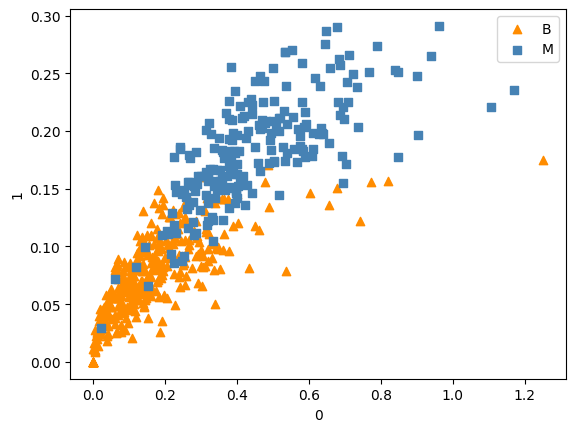

In [25]:
# visualizando as features selecionadas
df = pd.DataFrame(X_filtered, columns=[0, 1])
plot_2d_space(df, y, 0, 1)

In [26]:
#Nomes das features vistas durante o ajuste
ft_names = rfe.feature_names_in_
print(ft_names)

['radius_Mean' 'texture_Mean' 'periMeter_Mean' 'area_Mean'
 'sMoothness_Mean' 'coMpactness_Mean' 'concavity_Mean'
 'concave points_Mean' 'syMMetry_Mean' 'fractal_diMension_Mean'
 'radius_se' 'texture_se' 'periMeter_se' 'area_se' 'sMoothness_se'
 'coMpactness_se' 'concavity_se' 'concave points_se' 'syMMetry_se'
 'fractal_diMension_se' 'radius_worst' 'texture_worst' 'periMeter_worst'
 'area_worst' 'sMoothness_worst' 'coMpactness_worst' 'concavity_worst'
 'concave points_worst' 'syMMetry_worst' 'fractal_diMension_worst']


In [27]:
#Máscara de features selecionadas.
print("Suporte")
print(rfe.support_)
print("\nFeatures selecionadas:")
print(ft_names[rfe.support_])

Suporte
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False]

Features selecionadas:
['concavity_worst' 'concave points_worst']


In [28]:
#Ranking
rfe.ranking_

array([ 7, 20, 15, 29, 12, 11,  8,  9, 10, 26, 24,  5, 13, 21, 22, 18, 17,
       19, 27, 25,  6, 14, 23, 28,  4,  3,  1,  1,  2, 16])